<a href="https://colab.research.google.com/github/Michal-Predota/LabSpec1/blob/main/LabSpec_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NETWORKX
dokumentacja - [tu](https://networkx.org/documentation/stable/tutorial.html)<br>
tutorial na yt - [introduction to networkx in python](https://www.youtube.com/watch?v=flwcAf1_1RU)<br>
coś o Erdos-Renyi - [tu](https://networkx.org/documentation/stable/auto_examples/graph/plot_erdos_renyi.html#sphx-glr-auto-examples-graph-plot-erdos-renyi-py)
## Przydatne komendy
creating graphs:
`nx.barabasi_albert_graph(x,y)` <br>
`nx.draw_spring(x)` <br>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from datetime import datetime

# Rozkład rozmiarów komponentów

agregate excess after many iterations equals 175
<class 'dict_values'>


Text(0, 0.5, 'liczba zliczeń')

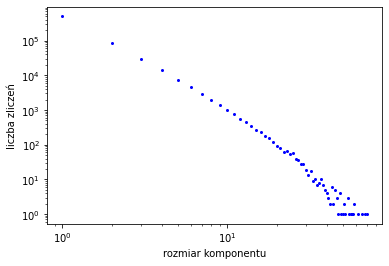

In [ ]:
#different ER https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html
#ER - n, p
n = 1000; #number of nodes
c = 0.7
p = c/n; #probability of edge creation
ile_symulacji = 1000



parametry = []#list of parameters for each generated graph
param1 = []#parametrs of one ER graph
array1 = []
for j in range(ile_symulacji):
  ER = nx.erdos_renyi_graph(n,p,random.seed(datetime.now()))
  ilosc  = nx.number_connected_components(ER)#number of components in a single graph
  lista = list(nx.connected_components(ER)) #list of component sizes
  #print(lista)
  #print(ilosc)
  
  for i in range(ilosc):#appeds an array with arrays(creating 2d array), first column is a number of cells in a component, second column is a decision of a component
   rand = random.uniform(0, 1)
   array1.append(len(lista[i]))
   if rand<1/3:
     parametry.append([len(lista[i]), -1])#component sells
   elif(1/3<rand and rand<2/3):
       parametry.append([len(lista[i]), 0])#component does nothing
   else:
       parametry.append([len(lista[i]), 1])#component buys
  #nx.draw_spring(ER)
  ER.clear()

D= [] #aggregate excess
D_temp = 0
D_sum=0#aggregate excess after may iterations


k=0

#print("array1", array1)

for i in range(len(parametry)):
    D_sum+=parametry[i][0]*parametry[i][1]

print("agregate excess after many iterations equals", D_sum)

counts = {}
for n in array1:
    counts[n] = counts.get(n, 0) + 1
#print("counts",counts)


x=list(counts.keys())
y=list(counts.values())

plt.plot(x, y, 'o', color='blue', markersize=2);


#plt.bar(x, y, color='b')
#plt.hist(np.log10(list(counts.keys())), log=True, bins=list(counts.values()))
#plt.loglog(list(counts.keys()), list(counts.values()))
plt.yscale('log', nonposy='clip')
plt.xscale('log')
plt.xlabel('rozmiar komponentu')
plt.ylabel('liczba zliczeń')
#plt.show()

# CB model
demand: <br>
$D = ∑_{α = 1}^{n_c} \phi_α W_α$ <br>
method:<br>

dla parametrów A zależy od rozmiaru sieci i C te same
rozkłady popytu

A -> im mniejsza sieć tym A musi być większe, bo jest coś takiego jak n_order (w tym herd) flow 2*A*N
n_order = 2aN -> a = 1/(2N) <- dolna granica 0.25 <- górna (ale może za duże ciągle)

# Rozkład stopnia wierzchołków

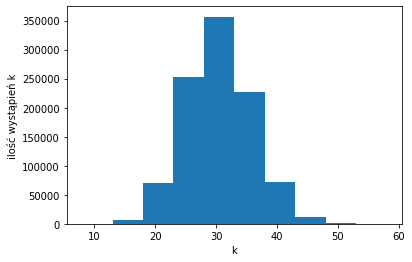

In [5]:
ys = [];
for i in range(1000):
  ER =nx.erdos_renyi_graph(1000, 0.03)
  ys.extend(list(dict(ER.degree()).values()));
plt.hist(ys)
plt.ylabel('ilość wystąpień k');
plt.xlabel('k');
plt.savefig("khist.svg")

# CB Model(komponenty, a, T)
$D = \sum_{\alpha=1}^{n_c} \phi_\alpha w_\alpha$

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from datetime import datetime

# Rozkład popytu zagregowanego

kupione  =  636
sprzedane  =  3209
nic  =  6450999
łącznie 6454844


Text(0, 0.5, 'counts')

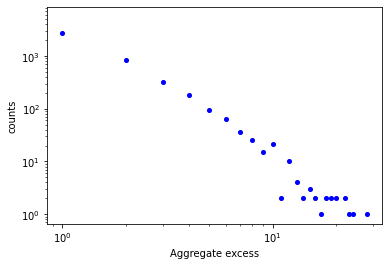

In [ ]:
#different ER https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html
#ER - n, p

n = 1000
T = 100;
a = 1/(2*n)
c = 0.7
p = c/n; #probability of edge creation
ile_symulacji = 100

D=0
D_tab = []

s = k = nic = 0

parametry = []#list of parameters for each generated graph
param1 = []#parametrs of one ER graph
array1 = []

for j in range(ile_symulacji):
  ER = nx.erdos_renyi_graph(n,p,random.seed(datetime.now()))
  komponenty  = nx.number_connected_components(ER)#number of components in a single graph
  lista = list(nx.connected_components(ER)) #list of component sizes
  #print(lista)
  for t in range(T):
    D=0
    for i in range(komponenty):#appeds an array with arrays(creating 2d array), first column is a number of cells in a component, second column is a decision of a component
      rand = random.uniform(0, 1)
      if rand<a:
        s+=1
        parametry.append([len(lista[i]), -1])#component sells
      elif(a<rand and rand<(2*a)):
          parametry.append([len(lista[i]), 1])#component buys
          k+=1
      else:
          parametry.append([len(lista[i]), 0])#component does nothing
          nic+=1
    for k in range(len(parametry)):
      D+=parametry[k][0]*parametry[k][1] #increase/decrease D according to parameters of each component
    D_tab.append(abs(D))
    parametry.clear()
    #print(len(parametry))
    

print("kupione  = ", k)
print("sprzedane  = ", s)
print("nic  = ", nic)
print("łącznie", k+s+nic)


#print(D_tab)

#print("agregate excess equals", D)


counts = {}
for n in D_tab:
    counts[n] = counts.get(n, 0) + 1
#print("counts",counts)



x=list(counts.keys())
y=list(counts.values())

plt.plot(x, y, 'o', color='blue', markersize=4);

plt.yscale('log', nonposy='clip')
plt.xscale('log')
plt.xlabel('Aggregate excess')
plt.ylabel('counts')
#plt.savefig("Aggregate excess 0,999.svg")

# Działający model C-B z dopasowaniem prostej i modyfikacjami

s/k 0.9956435036048473
slope =  -3.158045051684663
s/k 0.9918626827717737
slope =  -3.051459398097944
s/k 0.9931331419739456
slope =  -2.791162692805956
s/k 0.9968084188734582
slope =  -2.560847014197737
s/k 0.9987720394083075
slope =  -2.4076348656766853


Text(0, 0.5, 'counts')

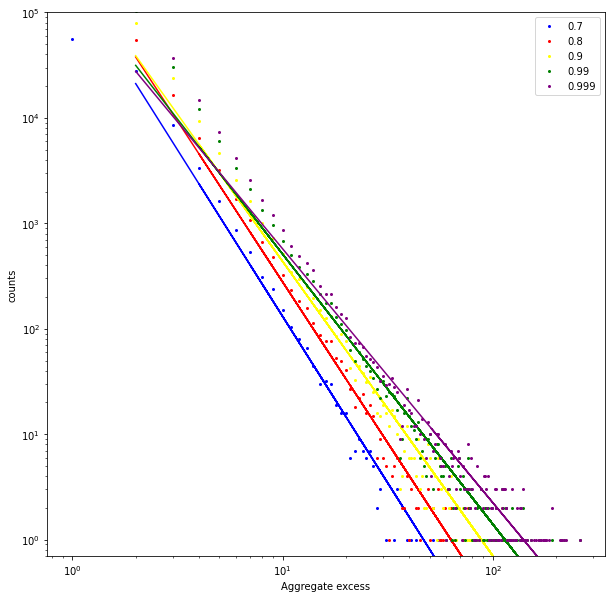

In [ ]:
N = 1000
T = 100
param_a = [5/10000, 1/1000, 0.005, 0.01, 0.02, 0.1] 
param_c = [0.7, 0.8, 0.9, 0.99, 0.999]
odciecia = [2, 2, 2, 2, 2]
#probability = param_c/N; #probability of edge creation
N_symulacji = 1000
Aggregate_excess = 0
Aggregate_excess_tab = []
parameters = []
kolory = ['blue', 'red', 'yellow', 'green', 'purple', 'orange']
randy = []

epsilon = 0

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

s =0
k =0

for h in range (len(param_c)):
  for j in range(N_symulacji):
    ER = nx.erdos_renyi_graph(N,param_c[h]/N,random.seed(datetime.now()))
    N_components = nx.number_connected_components(ER)
    sizes = list(nx.connected_components(ER))
    a_k = param_a[0]
    a_s = param_a[0]

    for t in range(T):
      Aggregate_excess = 0
      parameters.clear()
      for i in range(N_components):
            rand = random.uniform(0, 1)
            if(rand<a_s):
              Aggregate_excess+=len(sizes[i]) *(-1)#component sells
              s+=1
            if(a_s<=rand and rand<(a_s+a_k)):
              Aggregate_excess+=len(sizes[i]) *(1)#component buys
              k+=1
      Aggregate_excess_tab.append(abs(Aggregate_excess)+1)
      if(t!=1):
        PI = np.log(Aggregate_excess_tab[t]/Aggregate_excess_tab[t-1])
        a_k = (1+epsilon*PI)*a_k
        a_s = (1-epsilon*PI)*a_s
      
  print("s/k", s/k)

  counts = {}
  for n in Aggregate_excess_tab:
      counts[n] = counts.get(n, 0) + 1
  x=list(counts.keys())
  y=list(counts.values())

  xs = np.array(x) #tak trzeba bo x to jest lista i się nie pomnozy przez a później
  ys = np.array(y) #tak trzeba bo y to jest lista i się nie pomnozy przez a później

  xs = xs[odciecia[h]:]
  ys = ys[odciecia[h]:]
  
  plt.plot(x, y, 'o', color=kolory[h], markersize=2, label = param_c[h]);

  logA = np.log(xs) #no need for list comprehension since all z values >= 1
  logB = np.log(ys)

  m, c = np.polyfit(logA, logB, 1) # fit log(y) = m*log(x) + c
  print("slope = ", m)
  y_fit = np.exp(m*logA + c) # calculate the fitted values of y 

  plt.plot(xs, y_fit, '-', color=kolory[h])



plt.ylim(0.7, 10**5)

plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Aggregate excess')
plt.ylabel('counts')
#plt.savefig("Aggregate excess 0,999.svg")